In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.ensemble
import itertools
import scipy

# Primera Parte 

a) Reproduzca la Figura 8.8 del texto guia.

In [3]:
data = pd.read_csv('Heart.csv')
Y = data['AHD'].values.reshape(-1,1).ravel()
X = data[['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope']] # quite 'ChestPain', 'Ca', 'Thal' para que me de algo por ahora

In [4]:
def Vote(n_Yes_predict, n_No_predict):
    # majority votes en cada uno de los subsets
    maj_vote = ''
    if(n_Yes_predict > n_No_predict):
        maj_vote = 'Yes'
    elif(n_Yes_predict < n_No_predict):
        maj_vote = 'No'
    else:
        pass

    return maj_vote

In [5]:
# Bagging

def Bagging_Error(X, Y, B):
    X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)
    
    kf = sklearn.model_selection.KFold(n_splits=B, shuffle=True)
    #num_splits = kf.get_n_splits(X_train) # n_splits = B
    
    Error_test = []
    for train_index, test_index in kf.split(X_train):
        # elijo aleatoeriamente B subsets de X_train 
        x_train, x_test = X.values[train_index, :] , X.values[test_index, :]
        y_train, y_test = Y[train_index] , Y[test_index]

        # hago predicciones sobre cada x_train
        bf = sklearn.ensemble.BaggingClassifier()
        bf.fit(x_train, y_train)
        Y_predict = bf.predict(x_train)
        
        score = bf.score(x_test, y_test)
        Error_test.append(score)

        Yes_predict = (Y_predict == 'Yes')  
        No_predict = (Y_predict == 'No')  

        # cuento el numero de predicciones en Yes y No
        n_Yes_predict = np.count_nonzero(Yes_predict)
        n_No_predict = np.count_nonzero(No_predict)

        Vote(n_Yes_predict, n_No_predict)

    # busco ahora cual es el majority vote de todos los majority votes (me salgo del for)
    Yes_predict = (Y_predict == 'Yes')  
    No_predict = (Y_predict == 'No')  

    # cuento el numero de predicciones en Yes y No
    n_Yes_predict = np.count_nonzero(Yes_predict)
    n_No_predict = np.count_nonzero(No_predict)

    return Vote(n_Yes_predict, n_No_predict), Error_test

#print(len(Bagging_Error(X, Y, 5)[1]))

In [6]:
# Random Forest

def Random_Forest_Error(X, Y, all_predictors, B):
    X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

    # elijo aleatoeriamente B subsets de X_train 
    kf = sklearn.model_selection.KFold(n_splits=B, shuffle=True)
    num_splits = kf.get_n_splits(X_train) # n_splits = B7

    # genero una lista de predictores con tamaño m para elegir despues
    m_predictors = int(np.sqrt(len(all_predictors)))
    combinations = itertools.combinations(all_predictors, m_predictors)

    Predictors = []
    for c in combinations:
        predictors = list(c)
        Predictors.append(predictors)

    # elijo aleatoriamente los predictores que voy a usar con el tamaño que fije (m), lo hago antes de hacer el split de datos para no tener problemas con el tipopandas frame o nparray
    predictors = Predictors[np.random.randint(low=0, high=len(Predictors))]

    Error_test = [] # aqui voy a meter el error de la prediccion respecto al test
    # Hago el split de los datos en train y test con los parametros elegidos ya modificados 
    for train_index, test_index in kf.split(X_train):
        x_train, x_test = X[predictors].values[train_index, :] , X[predictors].values[test_index, :]
        y_train, y_test = Y[train_index] , Y[test_index]

        # hago predicciones sobre cada x_train
        bf = sklearn.ensemble.BaggingClassifier()
        bf.fit(x_train, y_train)
        Y_predict = bf.predict(x_train)

        score = bf.score(x_test, y_test)
        Error_test.append(score)

        Yes_predict = (Y_predict == 'Yes')  
        No_predict = (Y_predict == 'No')  

        # cuento el numero de predicciones en Yes y No
        n_Yes_predict = np.count_nonzero(Yes_predict)
        n_No_predict = np.count_nonzero(No_predict)

        Vote(n_Yes_predict, n_No_predict)

    # busco ahora cual es el majority vote de todos los majority votes (me salgo del for)
    Yes_predict = (Y_predict == 'Yes')  
    No_predict = (Y_predict == 'No')  

    # cuento el numero de predicciones en Yes y No
    n_Yes_predict = np.count_nonzero(Yes_predict)
    n_No_predict = np.count_nonzero(No_predict)

    return Vote(n_Yes_predict, n_No_predict), Error_test


all_predictors = ['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope']

#print(len(Random_Forest_Error(X,Y, all_predictors, 200)[1]))


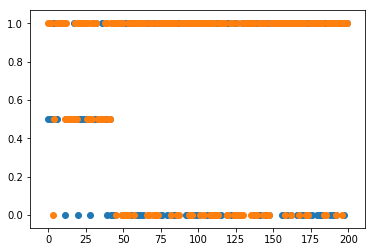

In [7]:
B = np.arange(0, 200, 1)
plt.figure()
plt.scatter(B, Random_Forest_Error(X,Y, all_predictors, len(B))[1])
plt.scatter(B, Bagging_Error(X,Y, len(B))[1])

b) Reproduzca la Figura 8.10 del texto guia. Utilice el dataset OJ.

In [6]:
data = pd.read_csv('OJ.csv')
Y = data['Purchase'].values.reshape(-1,1).ravel()
X = data[['WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH','DiscMM' , 'SpecialCH',  'SpecialMM',   'LoyalCH', 'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'PctDiscMM',  'PctDiscCH',  'ListPriceDiff',  'STORE']]

In [18]:
def Random_Forest(X, Y, all_predictors, m_predictors, B):
    X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

    # elijo aleatoeriamente B subsets de X_train 
    kf = sklearn.model_selection.KFold(n_splits=B, shuffle=True)
    num_splits = kf.get_n_splits(X_train) # n_splits = B7

    # genero una lista de predictores con tamaño m para elegir despues
    combinations = itertools.combinations(all_predictors, m_predictors)

    Predictors = []
    for c in combinations:
        predictors = list(c)
        Predictors.append(predictors)

    # elijo aleatoriamente los predictores que voy a usar con el tamaño que fije (m), lo hago antes de hacer el split de datos para no tener problemas con el tipopandas frame o nparray
    predictors = Predictors[np.random.randint(low=0, high=len(Predictors))]

    Error_test = [] # aqui voy a meter el error de la prediccion respecto al test
    # Hago el split de los datos en train y test con los parametros elegidos ya modificados 
    for train_index, test_index in kf.split(X_train):
        x_train, x_test = X[predictors].values[train_index, :] , X[predictors].values[test_index, :]
        y_train, y_test = Y[train_index] , Y[test_index]

        # hago predicciones sobre cada x_train
        bf = sklearn.ensemble.BaggingClassifier()
        bf.fit(x_train, y_train)
        Y_predict = bf.predict(x_train)

        score = bf.score(x_test, y_test)
        Error_test.append(score)

        Yes_predict = (Y_predict == 'Yes')  
        No_predict = (Y_predict == 'No')  

        # cuento el numero de predicciones en Yes y No
        n_Yes_predict = np.count_nonzero(Yes_predict)
        n_No_predict = np.count_nonzero(No_predict)

        Vote(n_Yes_predict, n_No_predict)

    # busco ahora cual es el majority vote de todos los majority votes (me salgo del for)
    Yes_predict = (Y_predict == 'Yes')  
    No_predict = (Y_predict == 'No')  

    # cuento el numero de predicciones en Yes y No
    n_Yes_predict = np.count_nonzero(Yes_predict)
    n_No_predict = np.count_nonzero(No_predict)

    return Vote(n_Yes_predict, n_No_predict), Error_test

In [20]:
all_predictors = ['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope']
p = len(all_predictors)
m_predictors = [p, int(p/2), int(np.sqrt(p))]
B = np.arange(0, 200, 1)
        
plt.figure()
#plt.plot(B, Random_Forest_Error(X, Y, all_predictors, m_predictors[0], len(B))[1])
#plt.plot(B, Random_Forest_Error(X, Y, all_predictors, m_predictors[1], len(B))[1])
#plt.plot(B, Random_Forest(X, Y, all_predictors, m_predictors[2], len(B))[1])

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# (Segunda parte)

c) Utilice el data set OJ para encontrar cual de los siguientes modelos logra predecir mejor el target Purchase:

    Logistic regresion.
    Linear discriminant analysis.
    Classification Tree.
    Random Forest. Haga explicito el criterio que utiliza para comparar los modelos.


In [21]:
data = pd.read_csv('OJ.csv')
Y = data['Purchase'].values.reshape(-1,1).ravel()
X = data[['WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH','DiscMM' , 'SpecialCH',  'SpecialMM',   'LoyalCH', 'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'PctDiscMM',  'PctDiscCH',  'ListPriceDiff',  'STORE']]

In [61]:
# logistic regresssion 
import sklearn.linear_model
import sklearn.discriminant_analysis

f = sklearn.linear_model.LogisticRegression()
g = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()

def fit(X, Y, f_method, plot=True):
    # Split in train and test
    X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y, test_size=0.4)

    #  Fit with train
    f_method.fit(X_train, Y_train)

    # Predict with test
    predict = f_method.predict(X_test)

    # This is the probability for the '+' class
    proba_yes = f_method.predict_proba(X_test)[:,1]

    # loop over n_p different values for the threshold probabiity
    n_p = 100
    error_rate = np.zeros(n_p)
    precision = np.zeros(n_p)
    recall = np.zeros(n_p)
    tp_rate = np.zeros(n_p)
    fp_rate = np.zeros(n_p)
    threshold = np.linspace(0,0.99, n_p)

    for i in range(n_p):
        ii = proba_yes>threshold[i]
        predict[ii] = 'CH'
        predict[~ii] = 'MM'
        true_positive = (Y_test == 'CH') & (predict == 'CH') 
        false_positive = (Y_test == 'MM') & (predict == 'CH')
        false_negative = (Y_test == 'CH') & (predict == 'MM')
        true_negative = (Y_test == 'MM') & (predict == 'MM')
        n_tp = np.count_nonzero(true_positive)
        n_fp= np.count_nonzero(false_positive)
        n_fn = np.count_nonzero(false_negative)
        n_tn = np.count_nonzero(true_negative)
        if((n_tp+n_fp)>0): precision[i] = n_tp/(n_tp + n_fp)
        if((n_tp+n_fn)>0): recall[i] = n_tp/(n_tp + n_fn); tp_rate[i] = recall[i]  
        if((n_fp+n_tn)>0): fp_rate[i] = n_fp/(n_fp+n_tn)

    # compute the area under each curve
    ii = np.argsort(recall)
    pr_area = scipy.integrate.trapz(precision[ii], recall[ii])
    
    ii = np.argsort(fp_rate)
    roc_area = scipy.integrate.trapz(tp_rate[ii], fp_rate[ii])
            
    # compute F1
    F1 = np.max(2.0*precision*recall/(precision+recall+1E-12))
    
    return {'pr_area':pr_area, 'roc_area':roc_area, 'F1':F1}

In [62]:
# classification tree
import sklearn.tree

def fit_ctree(X,Y, B):
    for i in range(len(B)):
        if(i==0):
            pass
        else:
            h = sklearn.tree.DecisionTreeClassifier(max_depth=int(i))
            h.fit(X, Y)

            predict = h.predict(X_test)

            # This is the probability for the '+' class
            proba_yes = h.predict_proba(X_test)[:,1]

            # loop over n_p different values for the threshold probabiity
            n_p = 100
            error_rate = np.zeros(n_p)
            precision = np.zeros(n_p)
            recall = np.zeros(n_p)
            tp_rate = np.zeros(n_p)
            fp_rate = np.zeros(n_p)
            threshold = np.linspace(0,0.99, n_p)

            for i in range(n_p):
                ii = proba_yes>threshold[i]
                predict[ii] = 'CH'
                predict[~ii] = 'MM'
                true_positive = (Y_test == 'CH') & (predict == 'CH') 
                false_positive = (Y_test == 'MM') & (predict == 'CH')
                false_negative = (Y_test == 'CH') & (predict == 'MM')
                true_negative = (Y_test == 'MM') & (predict == 'MM')
                n_tp = np.count_nonzero(true_positive)
                n_fp= np.count_nonzero(false_positive)
                n_fn = np.count_nonzero(false_negative)
                n_tn = np.count_nonzero(true_negative)
                if((n_tp+n_fp)>0): precision[i] = n_tp/(n_tp + n_fp)
                if((n_tp+n_fn)>0): recall[i] = n_tp/(n_tp + n_fn); tp_rate[i] = recall[i]  
                if((n_fp+n_tn)>0): fp_rate[i] = n_fp/(n_fp+n_tn)

            # compute the area under each curve
            ii = np.argsort(recall)
            pr_area = scipy.integrate.trapz(precision[ii], recall[ii])

            ii = np.argsort(fp_rate)
            roc_area = scipy.integrate.trapz(tp_rate[ii], fp_rate[ii])

            # compute F1
            F1 = np.max(2.0*precision*recall/(precision+recall+1E-12))
    return {'pr_area':pr_area, 'roc_area':roc_area, 'F1':F1}

In [71]:
import sklearn.ensemble

def fit_RF(X,Y,B):
    X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)
    for i in range(len(B)):
        if(i==0):
            pass
        else: 
            j = sklearn.ensemble.RandomForestClassifier(n_estimators=int(i), oob_score=True)
            j.fit(X_train, Y_train)
            predict = h.predict(X_test)
            proba_yes = h.predict_proba(X_test)[:,1]

             # loop over n_p different values for the threshold probabiity
            n_p = 100
            error_rate = np.zeros(n_p)
            precision = np.zeros(n_p)
            recall = np.zeros(n_p)
            tp_rate = np.zeros(n_p)
            fp_rate = np.zeros(n_p)
            threshold = np.linspace(0,0.99, n_p)

            for i in range(n_p):
                ii = proba_yes>threshold[i]
                predict[ii] = 'CH'
                predict[~ii] = 'MM'
                true_positive = (Y_test == 'CH') & (predict == 'CH') 
                false_positive = (Y_test == 'MM') & (predict == 'CH')
                false_negative = (Y_test == 'CH') & (predict == 'MM')
                true_negative = (Y_test == 'MM') & (predict == 'MM')
                n_tp = np.count_nonzero(true_positive)
                n_fp= np.count_nonzero(false_positive)
                n_fn = np.count_nonzero(false_negative)
                n_tn = np.count_nonzero(true_negative)
                if((n_tp+n_fp)>0): precision[i] = n_tp/(n_tp + n_fp)
                if((n_tp+n_fn)>0): recall[i] = n_tp/(n_tp + n_fn); tp_rate[i] = recall[i]  
                if((n_fp+n_tn)>0): fp_rate[i] = n_fp/(n_fp+n_tn)

            # compute the area under each curve
            ii = np.argsort(recall)
            pr_area = scipy.integrate.trapz(precision[ii], recall[ii])

            ii = np.argsort(fp_rate)
            roc_area = scipy.integrate.trapz(tp_rate[ii], fp_rate[ii])

            # compute F1
            F1 = np.max(2.0*precision*recall/(precision+recall+1E-12))
    return {'pr_area':pr_area, 'roc_area':roc_area, 'F1':F1}

Como el area de la curva de precision-recall es directamente propiorcional a que tan bueno es el modelo, 
de acuerdo a el siguiente kernel es evidente que para estasituacion los metodos de logisitc regression i discriminant analysis 
son mejores que classification tree y random forest, para los cuales el area de p-r es muy pequeña


In [72]:
# Logistic regrsssion
print(fit(X, Y, f, plot=True))
#lda 
print(fit(X, Y, g, plot=True))
# classification tree
B = np.arange(1, 100, 1)
print(fit_ctree(X,Y, B))
# Random forest
print(fit_RF(X,Y, B))

/srv/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


{'pr_area': 0.41670340816286494, 'roc_area': 0.0949879018320083, 'F1': 0.7612156295219598}
{'pr_area': 0.4168884902065972, 'roc_area': 0.10596201600294308, 'F1': 0.7594202898546014}
{'pr_area': 0.00108038029386344, 'roc_area': 0.001144688644688645, 'F1': 0.04587155963254608}


/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees we

{'pr_area': 0.00108038029386344, 'roc_area': 0.001144688644688645, 'F1': 0.04587155963254608}
